# Guided Example: Spam Filter
Unit 2 / Lesson 2 / Assignment 6

Here we're going to go through a basic __Naive Bayes classifier__.
Specifically we're going to build a spam filter.
As we've said before, this is a classic use for this kind of __classifier__ and it's not too difficult to set up.
The dataset we'll work with is UC Irvine's [SMS spam dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

This dataset has a few nice attributes.
It's pre-labelled, which is great for our purposes as we don't have to make our own spam/ham labels ('ham' being the common term to denote a message that is not spam).
The dataset also is relatively small, which will allow us to show off one of the great things about __Naive Bayes__, its ability to train on relatively little data while achieving reasonable accuracy.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
PATH = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
             "master/sms_spam_collection/SMSSpamCollection"
            )
sms_raw = pd.read_csv(PATH, delimiter='\t', header=None)
sms_raw.columns = ['spam', 'message']

print(len(sms_raw))
sms_raw.head()

5572


,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


So we've loaded up the dataset and we have two columns, a label and a message.

Now, a message isn't really a feature and if you tried to make it one it'd be pretty useless.
However, we can engineer features from the message field relatively easily.
This kind of _feature engineering_ is a basic version of what we'll cover in the NLP section.

At the most obvious level, a feature from the message can be whether it contains a given word, so let's add those columns to our dataframe.
The words chosen below are simply intuited as possibly having something to do with spam.

Try some of your own ideas too!

In [3]:
keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )


Note that you could add new features to the dataframe simply by adding them to the keywords list.
That's much nicer than doing each word manually.
If it were more complicated it would probably be worth making a function as well.

Another feature option would be if the message is all uppercase.
That seems kind of spammy doesn't it?

In [4]:
sms_raw['allcaps'] = sms_raw.message.str.isupper()

Before we go further, let's turn the spam column into a boolean so we can easily do some statistics to prepare for modeling.

In [5]:
sms_raw['spam'] = (sms_raw['spam'] == 'spam')

# Note that if you run this cell a second time everything will become false.
# So... Don't.

# after running this cell comment out the above code to prevent cell from running again

Now, as we covered before one of the main assumptions of __Naive Bayes__ is that the variables fed into the model are _independent of each other_.
Let's check to see how true that is in this case using Pandas' built in correlation matrix function, corr(), and the heatmap from seaborn.

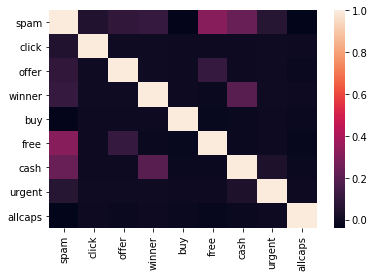

In [6]:
sns.heatmap(sms_raw.corr());

That is a great looking plot for us, most of the words show strong independence from each other.
The only exceptions are `free:offer` and `cash:winner`.
For now, let's keep everything in the dataset.

Before we actually run the model we have to build out our training data.
SKLearn required you to specify an outcome (y or dependent variable) and your inputs (x or independent variables).
We'll do that below under the titles data and target.

### Bernoulli Classifier

In [7]:
data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 5572 points: 604


Now try adding some of your own _features_ and see if you can improve the model's performance.
Also try comparing the other types of __Naive Bayes Classifier__ and see which one is best.
You can find the function names for training other kinds of __Naive Bayes__ in the [documentation](https://scikit-learn.org/stable/modules/naive_bayes.html).

### Gaussian Classifier

In [9]:
# let's try our Naive Bayes model again with the Gaussian classifier
from sklearn.naive_bayes import GaussianNB

# instantiate our model and store it as a new variable
gnb = GaussianNB()

# fit our model to the date
gnb.fit(data, target)

# classify and store result in a new variable
y_pred_gnb = gnb.predict(data)

# display results
print('Gaussion number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred_gnb).sum()
    ))

Gaussion number of mislabeled points out of a total 5572 points: 604


### Multinomial Classifier

In [10]:
# let's try our Naive Bayes model again with the Multinomial classifier
from sklearn.naive_bayes import MultinomialNB

# instantiate our mode and store it as a new variable
mnb = MultinomialNB()

# fit model to the data
mnb.fit(data, target)

# classify and store result in a new variable
y_pred_mnb = mnb.predict(data)

# display results
print('Multinomial number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred_mnb).sum()
    ))

Multinomial number of mislabeled points out of a total 5572 points: 693


Looks like we achieved similar results with our three different __Naive Bayes classifiers__.
We had slightly better results with the __Bernoulli__ and __Gaussian classifiers__, and we know from binary/boolean nature of our data, the __Bernoulli__ is the most appropriate __classifier__.

So let's see if we can improve our results with a few new features.
Let's update our list of keywords with the most common words found in spam emails from this article from [Forbes](https://www.forbes.com/sites/firewall/2010/03/17/the-most-common-words-in-spam-email/#458425377d80).

In [11]:
# add new spam keywords to improve our model

keywords = ['click', 'offer', 'winner', 'buy', 'free', 'cash', 'urgent']
keywords = keywords + ['shipping!', 'today!', 'here!', 'available', 'fingertips!','online!']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

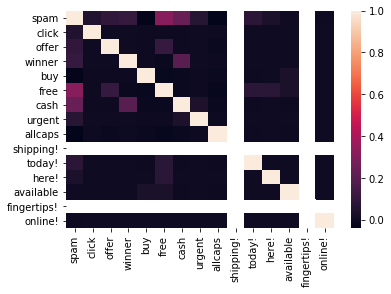

In [12]:
# let's see if any of our new keywords are highly correlated
sns.heatmap(sms_raw.corr());

In [13]:
# let's drop the '!' from 'shipping' and 'fingertips'
# and see if that improves our results

keywords.remove('shipping!')
keywords.remove('fingertips!')
keywords = keywords + ['shipping', 'fingertips']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(key)] = sms_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

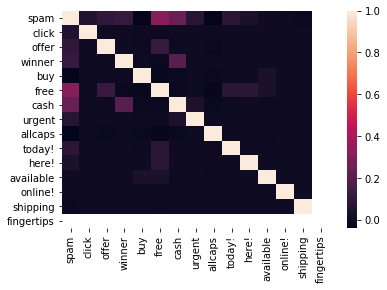

In [14]:
sms_raw = sms_raw.drop('shipping!', axis=1)
sms_raw = sms_raw.drop('fingertips!', axis=1)

sns.heatmap(sms_raw.corr());

This looks better, but it looks like `fingertips` doesn't have any matches to our spam messages.
Let's remove that feature and conduct our __Bernoulli__ model again.

In [15]:
sms_raw = sms_raw.drop('fingertips', axis=1)

keywords.remove('fingertips')

data = sms_raw[keywords + ['allcaps']]
target = sms_raw['spam']

In [16]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# instantiate our model and store it in a new variable
bnb = BernoulliNB()

# fit our model to the data
bnb.fit(data, target)

# classify, storing the result in a new variable
y_pred = bnb.predict(data)

# display our results
print('Number of mislabeled points out of a total {} points: {}'.format(
    data.shape[0],
    (target != y_pred).sum()
    ))

Number of mislabeled points out of a total 5572 points: 599


Well we _technically_ improved our model.
Not by much.


### Bayesian Poisoning

When implementing __Naive Bayes__, there is one more thing you must be aware of.
__Naive Bayes__ relies on probabilities and these probabilities are often based around obvious keywords.
This makes the model vulnerable to manipulation.
We people manipulate a __Naive Bayes__ model it's called _Bayesian Poisoning_.

In spam, this would be done through including words in your spam message that would be highly unlikely to be part of a spam message.
This would convince the model that the message is legitimate and let it into your inbox or wherever.

Can you think of how you could do that here? Look at some spam messages that your model correctly identified and see if you can reword or rework them to get them classified as ham.